In [3]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


 
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data cleaning and checking null values

In [5]:
data.shape

(4177, 9)

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.isnull().sum().sum()

0

In [8]:
data.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [9]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

### changing column name

In [10]:
data.rename(columns={'Whole weight': 'Whole_weight', 'Shucked weight': 'Shucked_weight','Viscera weight':'Viscera_weight','Shell weight':'Shell_weight',}, inplace=True)

In [11]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Encoding 'sex' column

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()
le.fit(data['Sex'])

LabelEncoder()

In [14]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [15]:
data['Sex']=le.transform(data['Sex'])

In [16]:
le.inverse_transform([2,1,0])

array(['M', 'I', 'F'], dtype=object)

In [17]:
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [18]:
data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

# data visualization

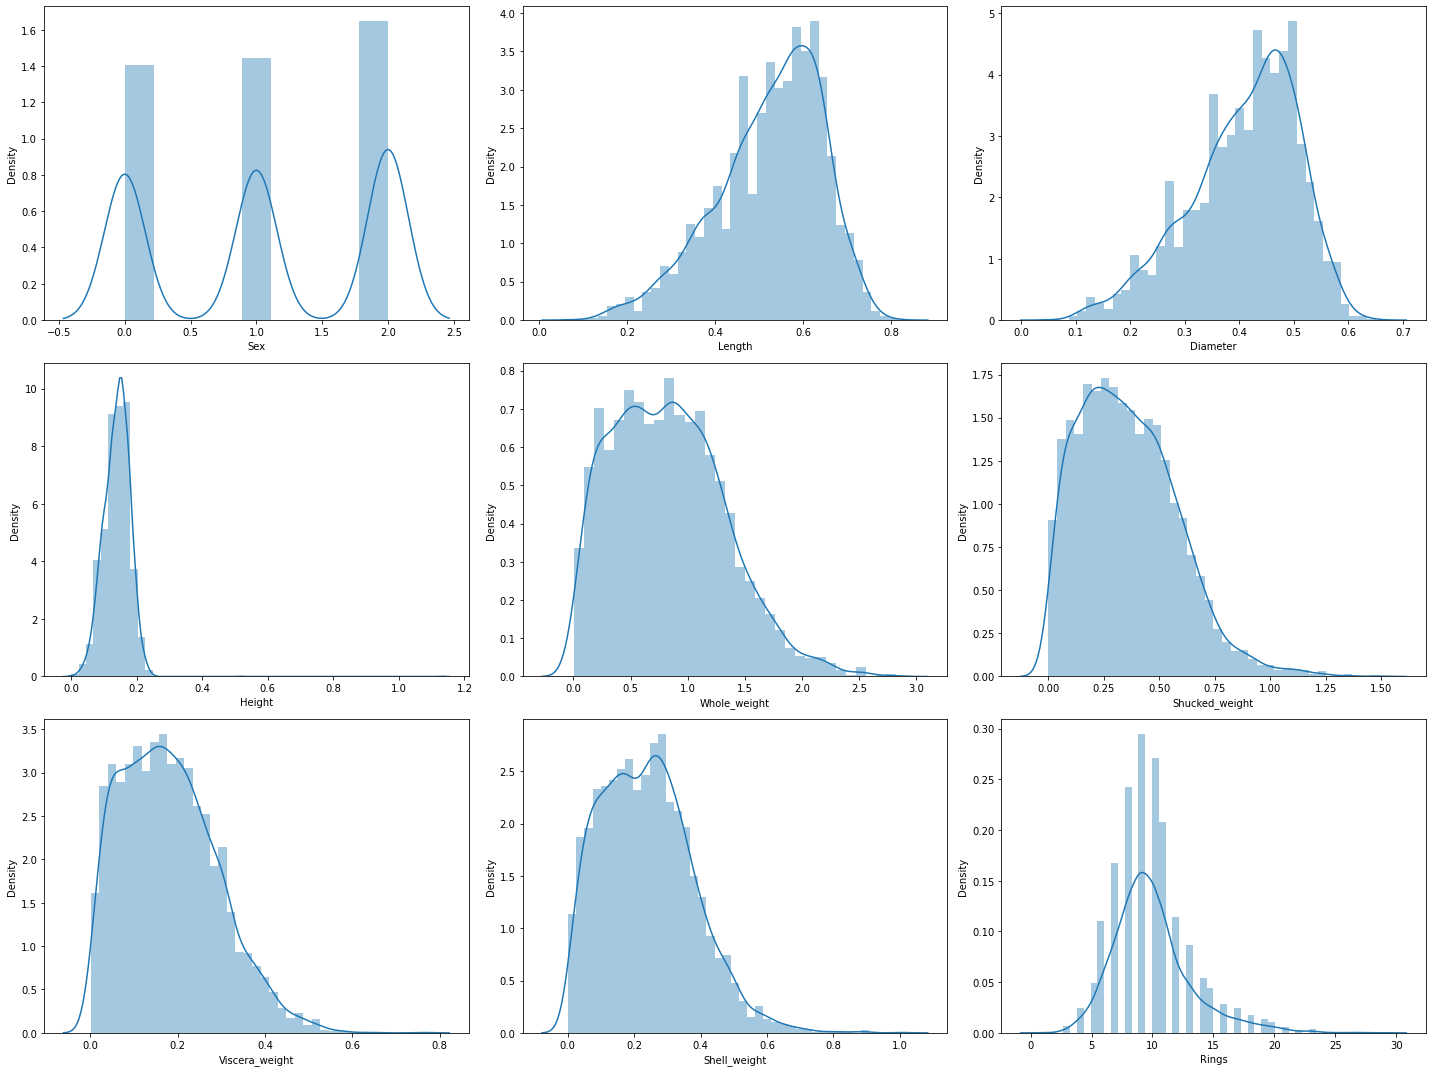

In [19]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

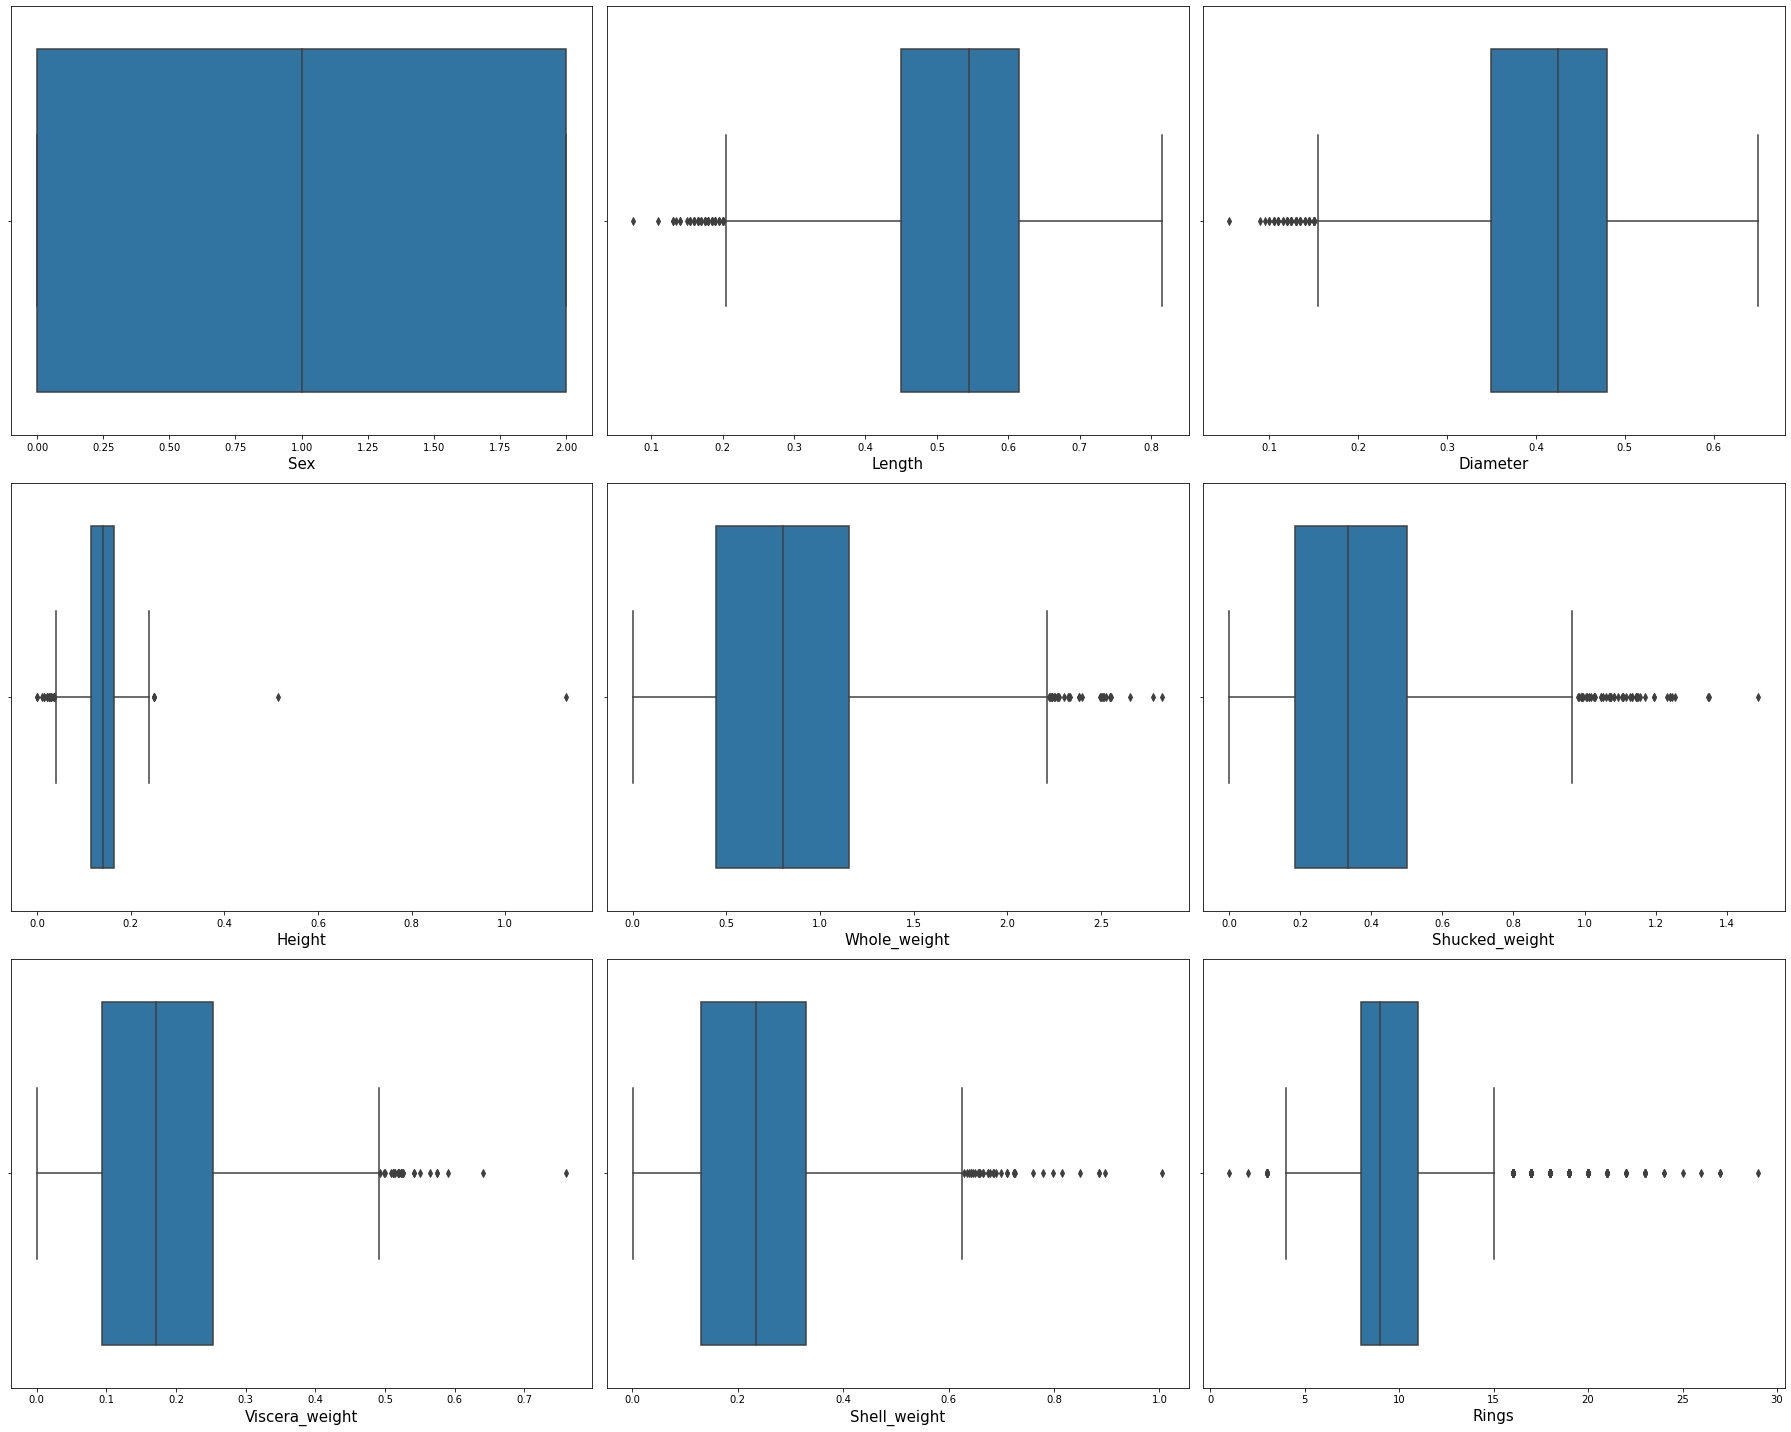

In [20]:
plt.figure(figsize=(25,20))
plotnumber=1


for column in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# removing outlier and skewness

In [21]:
#1st quantile 
q1= data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1

In [22]:
Length=(q1.Length - (1.5*iqr.Length))
Length             

0.20250000000000004

In [23]:
index=np.where(data['Length'] < Length)
index

(array([ 148,  149,  236,  237,  238,  239,  305,  306,  321,  465,  523,
         525,  526,  611,  694,  696,  718,  719,  720, 1053, 1054, 1055,
        1056, 1210, 1429, 1824, 1986, 1987, 2114, 2115, 2169, 2171, 2343,
        2371, 2380, 2381, 2458, 2711, 3141, 3143, 3190, 3318, 3380, 3472,
        3600, 3837, 3899, 3902, 3994], dtype=int64),)

In [24]:
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4123,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4124,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4125,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4126,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [25]:
data.shape

(4128, 9)

In [26]:
Diameter=(q1.Diameter- (1.5*iqr.Diameter))
Diameter          

0.15499999999999997

In [27]:
index=np.where(data['Diameter']< Diameter)
index

(array([  43,   44,  510,  873,  879, 1960, 2140, 2508, 2674, 3429, 3477,
        3671], dtype=int64),)

In [28]:
data=data.drop(data.index[index])
data.reset_index()

,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4111,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4112,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4113,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4114,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
Whole_weight=(q3.Whole_weight + (1.5*iqr.Whole_weight))
print(Whole_weight)   

index=np.where(data['Whole_weight']> Whole_weight)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

2.22025
(4086, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4081,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4082,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4083,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4084,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [30]:
Shucked_weight=(q3.Shucked_weight + (1.5*iqr.Shucked_weight))
print(Shucked_weight)   

index=np.where(data['Shucked_weight']> Shucked_weight)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

0.976
(4061, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4056,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4057,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4058,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4059,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [31]:
Viscera_weight=(q3.Viscera_weight + (1.5*iqr.Viscera_weight))
print(Viscera_weight)   

index=np.where(data['Viscera_weight']> Viscera_weight)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

0.49225
(4053, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4048,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4049,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4050,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4051,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [32]:
Shell_weight=(q3.Shell_weight + (1.5*iqr.Shell_weight))
print(Shell_weight)   

index=np.where(data['Shell_weight']> Shell_weight)
index

data=data.drop(data.index[index])
print(data.shape)

data.reset_index()

0.6275
(4029, 9)


,index,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4024,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4025,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4026,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4027,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# Data visualization after removing the outliers and skewness

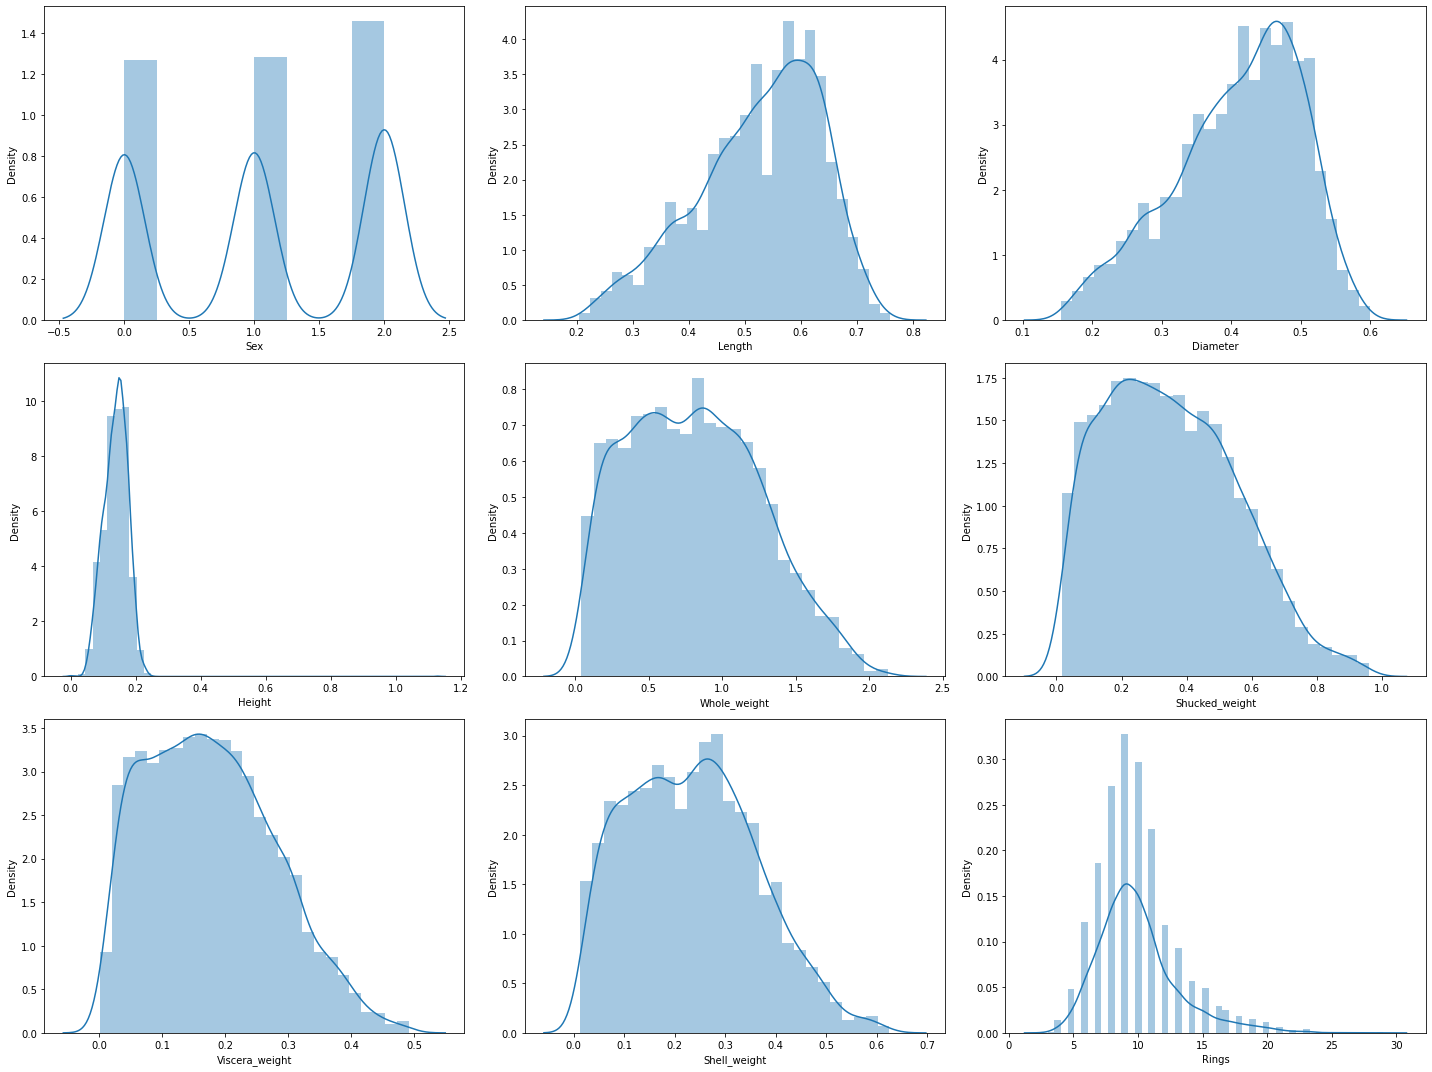

In [33]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.tight_layout()

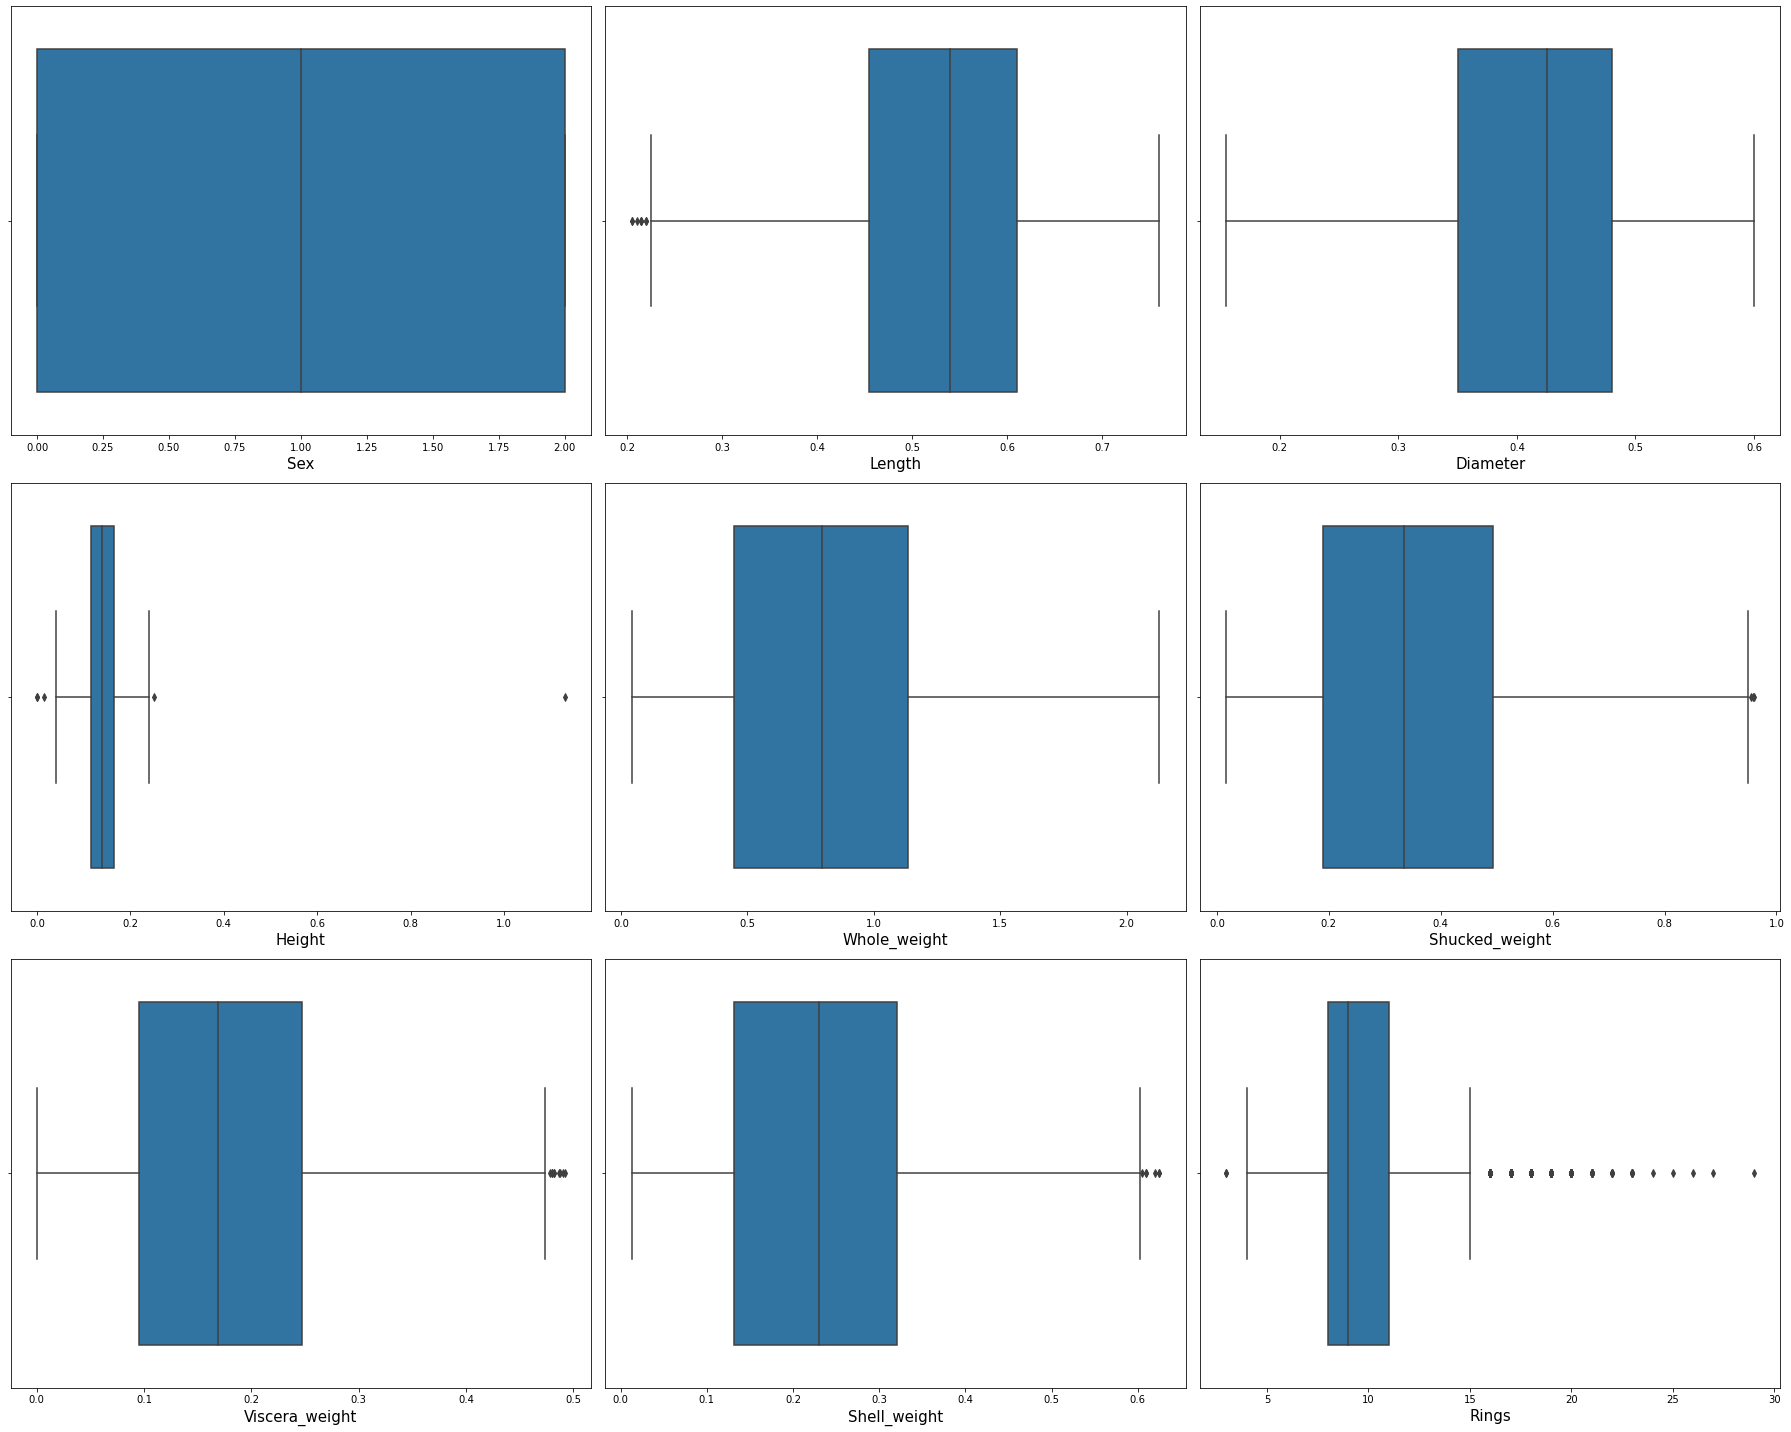

In [34]:
plt.figure(figsize=(25,20))
plotnumber=1


for column in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

# Creating features and target

In [62]:
X=data.drop(['Rings'], axis = 1)
y = data['Rings']

In [63]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [64]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4029, dtype: int64

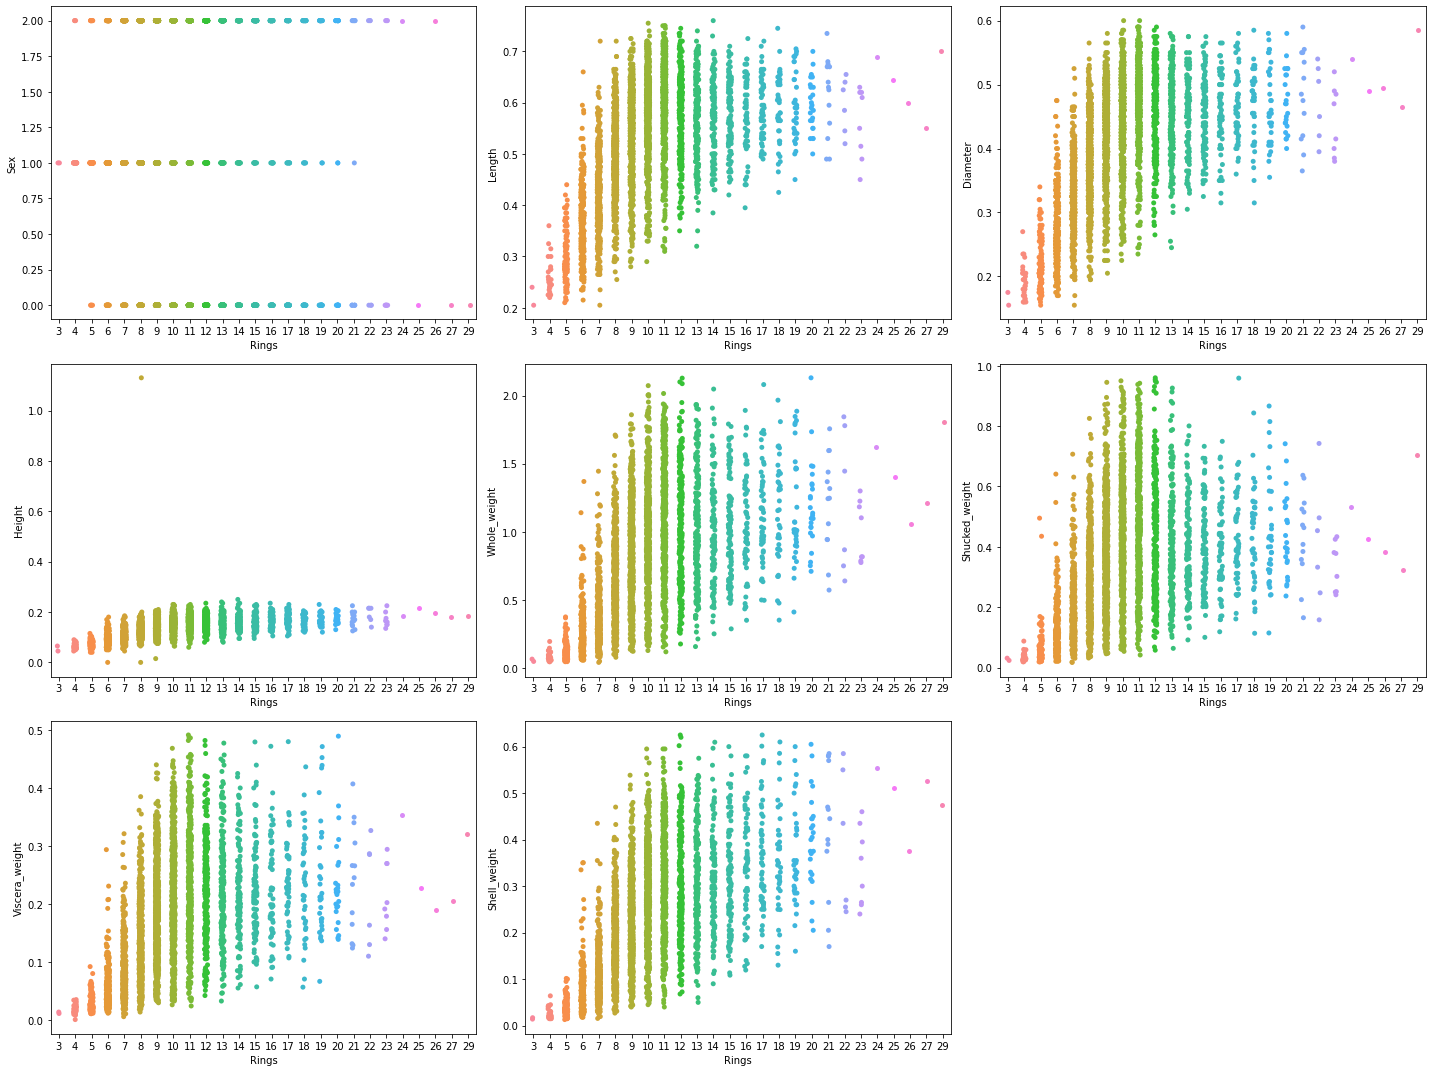

In [65]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

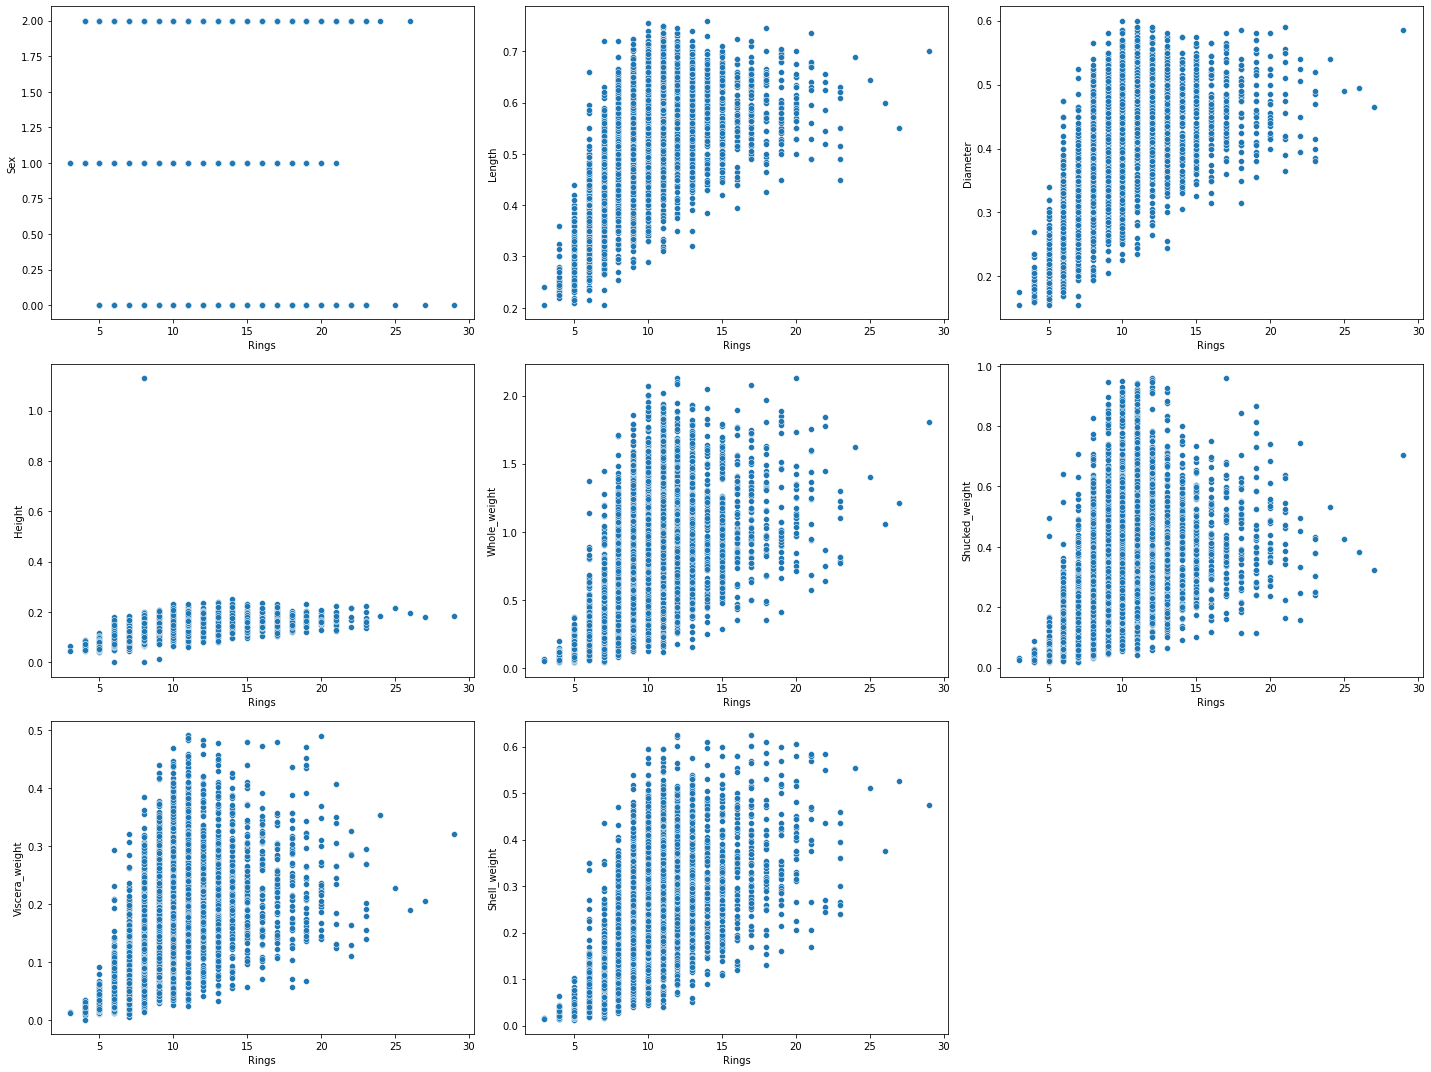

In [66]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in X :
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.scatterplot(y,X[column])
        
    plotnumber+=1
plt.tight_layout()

# Checking Multicollinearity and mapping heatmap

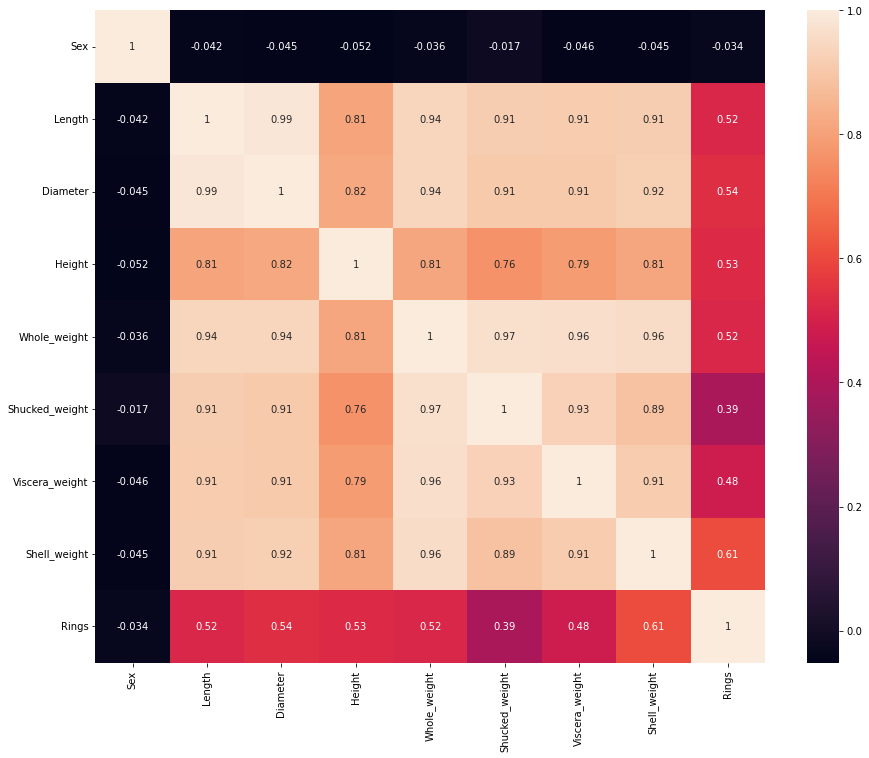

In [67]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True,annot_kws={'size':10})
plt.show()

In [68]:
X=data.drop(['Sex','Rings'], axis = 1)

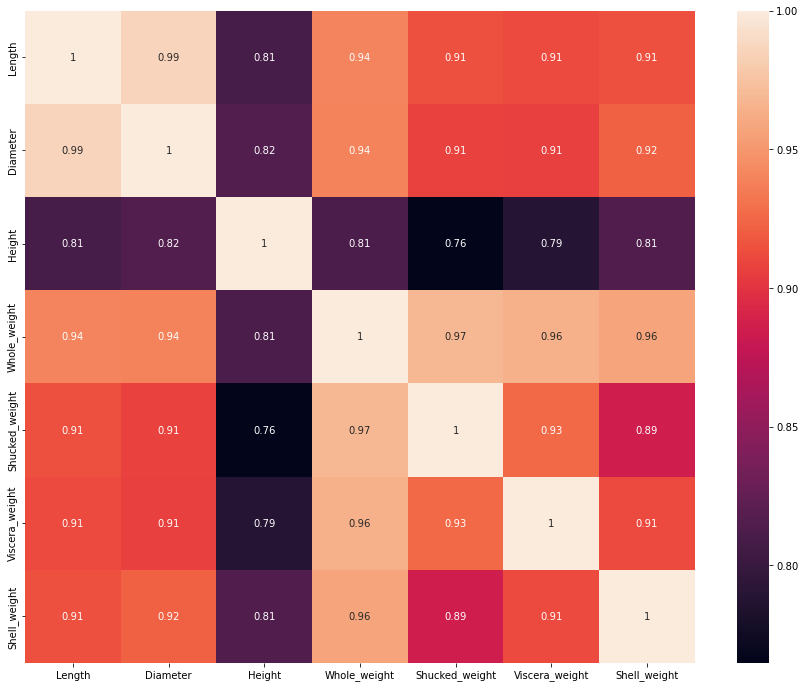

In [69]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(), annot=True,annot_kws={'size':10})
plt.show()

In [70]:
X.shape

(4029, 7)

In [74]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [75]:
from sklearn. model_selection import cross_val_score


In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

# 1. Linear regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [108]:
lm= LinearRegression()


lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', lm.score(X_train,y_train))
print('testing score:', lm.score(X_test,y_test))

r2_score : 0.5308685754906677
MAE : 1.5706544179133926
MSE : 4.734085624298617
RMSE : 1.2532575225840028
/n --------------------------------------------------
Training score : 0.4958302986799188
testing score: 0.5308685754906677


In [110]:
cross_val_score(lm,X_scaled,y,cv=5).mean()

0.35575898564771213

# 2. Ridge

In [91]:
from sklearn.linear_model import Ridge

In [92]:
ridge= Ridge()


ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', ridge.score(X_train,y_train))
print('testing score:', ridge.score(X_test,y_test))

r2_score : 0.5318915786831326
MAE : 1.5695566717859835
MSE : 4.723762323717919
RMSE : 1.252819488907314
/n --------------------------------------------------
Training score : 0.4957781397145016
testing score: 0.5318915786831326


In [111]:
cross_val_score(ridge,X_scaled,y,cv=5).mean()

0.35645779739102984

# 3. RandomForestRegression

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
regr = RandomForestRegressor()

In [106]:
regr= RandomForestRegressor()


regr.fit(X_train,y_train)
y_pred =regr.predict(X_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', regr.score(X_train,y_train))
print('testing score:', regr.score(X_test,y_test))

r2_score : 0.5398442341355094
MAE : 1.5320238095238095
MSE : 4.643510714285714
RMSE : 1.237749493849143
/n --------------------------------------------------
Training score : 0.9302160320838068
testing score: 0.5398442341355094


In [112]:
cross_val_score(regr,X_scaled,y,cv=5).mean()

0.3865325939779426

# 4. Gradient Boosting Regressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gbr= GradientBoostingRegressor()


gbr.fit(X_train,y_train)
y_pred =gbr.predict(X_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', gbr.score(X_train,y_train))
print('testing score:', gbr.score(X_test,y_test))

r2_score : 0.5646990566544534
MAE : 1.4754025720507318
MSE : 4.3926964395768895
RMSE : 1.2146615051324923
/n --------------------------------------------------
Training score : 0.6243042361625939
testing score: 0.5646990566544534


In [113]:
cross_val_score(gbr,X_scaled,y,cv=5).mean()

0.3982727098569203

# 5. KNeighborsRegressor

In [101]:
from sklearn.neighbors import KNeighborsRegressor

In [103]:
knr= KNeighborsRegressor()


knr.fit(X_train,y_train)
y_pred =knr.predict(X_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', knr.score(X_train,y_train))
print('testing score:', knr.score(X_test,y_test))

r2_score : 0.47231101552323373
MAE : 1.6265873015873018
MSE : 5.325
RMSE : 1.2753773173407554
/n --------------------------------------------------
Training score : 0.6147120531638741
testing score: 0.47231101552323373


In [114]:
cross_val_score(knr,X_scaled,y,cv=5).mean()

0.32463736120997266

# 6. Support vector Regression

In [104]:
from sklearn.svm import SVR

In [107]:
svr = SVR(kernel = 'linear')


svr.fit(X_train,y_train)
y_pred =svr.predict(X_test)

print('r2_score :',r2_score(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred)))

print('/n', '-' *50)

print('Training score :', svr.score(X_train,y_train))
print('testing score:', svr.score(X_test,y_test))

r2_score : 0.5066182435749739
MAE : 1.5240911146271903
MSE : 4.978799880706891
RMSE : 1.2345408517449676
/n --------------------------------------------------
Training score : 0.4653035248943127
testing score: 0.5066182435749739


In [115]:
cross_val_score(svr,X_scaled,y,cv=5).mean()

0.3747133938600613

## Hyperparameter tuning

In [117]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid={ "n_estimators"     : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]
        }

In [120]:
grid_search=GridSearchCV(estimator=regr, param_grid=param_grid,n_jobs=-1,cv=5)

In [121]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [122]:
best_param =grid_search.best_params_
print(best_param)

{'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 30}


In [123]:
grid_search.best_score_

0.49855067212414783

In [126]:
grid_search=RandomForestRegressor(bootstrap = True, max_features= 'log2', min_samples_split= 8, n_estimators= 30)
grid_search.fit(X_train,y_train)

RandomForestRegressor(max_features='log2', min_samples_split=8, n_estimators=30)

In [127]:
y_pred2=grid_search.predict(X_test)

In [128]:
print('r2_score :',r2_score(y_test,y_pred2))
print('MAE :',mean_absolute_error(y_test,y_pred2))
print('MSE :',mean_squared_error(y_test,y_pred2))
print('RMSE :',np.sqrt(mean_absolute_error(y_test,y_pred2)))

print('/n', '-' *50)

print('Training score :', svr.score(X_train,y_train))
print('testing score:', svr.score(X_test,y_test))

r2_score : 0.5500578109667852
MAE : 1.5031347075787833
MSE : 4.540443759646759
RMSE : 1.2260239424981811
/n --------------------------------------------------
Training score : 0.4653035248943127
testing score: 0.5066182435749739
